In [1]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
# Python SQL toolkit and Object Relatio# Import Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import extract
from sqlalchemy import create_engine, func

In [3]:
#Preparing database files
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
# Design a query to retrieve & transactions for month of 'June'
june_results = []
june_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)=='06').all()

In [10]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df1 = pd.DataFrame(june_results, columns=['date','precipitation'])
df1.set_index(df1['date'], inplace=True)
 
# Sort the dataframe by date
june_df = df1.sort_index()

# Convert dataframe to strings and suppress printing the index (which is the first data column)
#print(june_df.to_string(index=False))


In [14]:
# Design a query to retrieve & transactions for month of 'December'
dec_results = []
dec_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)=='12').all()

In [16]:
#Save the query results as a Pandas DataFrame and set the index to the date column
df2 = pd.DataFrame(dec_results, columns=['date','precipitation'])
df2.set_index(df2['date'], inplace=True)

# print (df) 
# Sort the dataframe by date
dec_df = df2.sort_index()

# Convert dataframe to strings and suppress printing the index (which is the first data column)
#print(dec_df.to_string(index=False))

In [18]:
# Describe June
june_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [19]:
#describe December 
dec_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


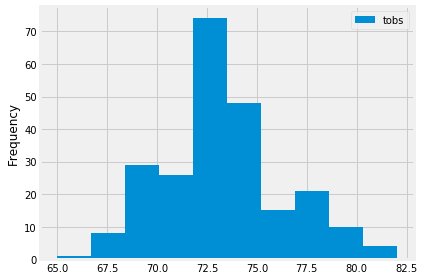

In [20]:
#Plot June
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date)=='06').all()
# filter(Measurement.date >= prev_year).all()
# print(results)  # line of code for debugging
df = pd.DataFrame(results, columns=['tobs'])
# print(df)  # used for debugging 

df.plot.hist(bins=10)
plt.tight_layout()

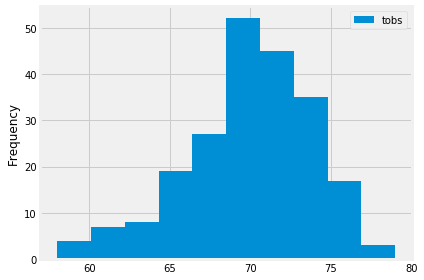

In [21]:
# Plat December 
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date)=='12').all()
# filter(Measurement.date >= prev_year).all()
# print(results)  # line of code for debugging
df = pd.DataFrame(results, columns=['tobs'])
# print(df)  # used for debugging 

df.plot.hist(bins=10)
plt.tight_layout()